In [75]:
import xclim
import xarray as xr
from pathlib import Path
import os
from pprint import pprint

import matplotlib.pyplot as plt
import cartopy.crs as crs
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [10]:
# Set working directory as project root
if os.getcwd().split('/')[-1] != "esowc_notes":
    os.chdir('..')
    
assert os.getcwd().split('/')[-1] == "esowc_notes", f"Working directory should be the root (), currently: {os.getcwd()}"
print("Current Directory: ",os.getcwd())

Current Directory:  /Users/tommylees/github/esowc_notes


In [13]:
# Set data_dir to external if on tommy's laptop (no space!)
if os.getcwd().split('/')[2] == 'tommylees':
    data_dir = Path("/Volumes/Lees_Extend/data/ecmwf_sowc/")
else:
    data_dir = Path('./data')
    
print(data_dir)
pprint([f.as_posix().split('/')[-1] for f in data_dir.glob('*')])

/Volumes/Lees_Extend/data/ecmwf_sowc
['.DS_Store',
 'chirps_kenya.nc',
 'chirps_kenya2.nc',
 'countries_shp',
 'countries_shp.zip',
 'era5_test.grib',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip',
 'ESACCI-LC-Legend.csv',
 'GRUN_v1_GSWP3_WGS84_05_1902_2014.nc',
 'kenya_precip_JanJune.grib',
 'kenya_rainfall.nc',
 'kenya_rainfall1.nc',
 'kenya_rainfall2.nc',
 'kenya_rainfall4.nc',
 'kenya_rainfall_.nc',
 'orography.grib',
 'pressure.grib',
 'vhi']


# Get Kenya Precip & Runoff

In [53]:
from src.api_helpers import Region

# get geog location & turn into a subset string
kenya_region = Region(
    name='kenya',
    lonmin=33.501,
    lonmax=42.283,
    latmin=-5.202,
    latmax=6.002,
)

In [58]:
chirps = xr.open_dataset(Path("/Volumes/Lees_Extend/data/ea_data/predict_vegetation_health.nc"))
chirps = chirps.rename({'lat':'latitude','lon':'longitude'})
chirps

<xarray.Dataset>
Dimensions:                 (latitude: 404, longitude: 384, time: 203)
Coordinates:
  * time                    (time) datetime64[ns] 2000-02-29 ... 2016-12-31
  * longitude               (longitude) float32 32.625 32.675003 ... 51.774994
  * latitude                (latitude) float32 -4.9750023 ... 15.174995
Data variables:
    evaporation             (time, latitude, longitude) float64 ...
    baresoil_evaporation    (time, latitude, longitude) float64 ...
    openwater_evaporation   (time, latitude, longitude) float64 ...
    potential_evaporation   (time, latitude, longitude) float64 ...
    snow_subblimation       (time, latitude, longitude) float64 ...
    interception_loss       (time, latitude, longitude) float64 ...
    transpiration           (time, latitude, longitude) float64 ...
    evaporative_stress      (time, latitude, longitude) float64 ...
    surface_soil_moisture   (time, latitude, longitude) float64 ...
    rootzone_soil_moisture  (time, latitude,

In [59]:
grun = xr.open_dataset(data_dir/'GRUN_v1_GSWP3_WGS84_05_1902_2014.nc')
grun.attrs = ""
grun = grun.rename({'lat':'latitude','lon':'longitude'})
grun

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 720, time: 1356)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 1902-01-01 1902-02-01 ... 2014-12-01
Data variables:
    Runoff     (time, latitude, longitude) float32 ...

In [60]:
from src.eng_utils import select_bounding_box_xarray
grun = select_bounding_box_xarray(grun, kenya_region)
chirps = select_bounding_box_xarray(chirps, kenya_region)

selecting region: kenya from ds
selecting region: kenya from ds


In [61]:
# select the variable of interest
g = grun.Runoff
c = chirps.precip

# Explore xclim 

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1c343c4d68>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1c343c4d68>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<xarray.DataArray (time: 17, latitude: 220, longitude: 176)>
dask.array<shape=(17, 220, 176), dtype=float64, chunksize=(1, 220, 176)>
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2016-01-01
  * longitude  (longitude) float32 33.524994 33.574997 ... 42.22499 42.274994
  * latitude   (latitude) float32 -4.9750023 -4.925003 ... 5.924999 5.9749985
Attributes:
    units:    days

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


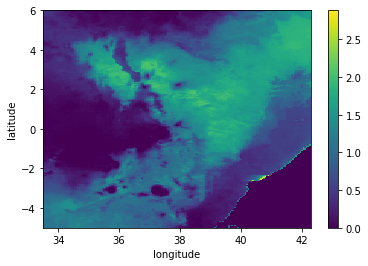

In [91]:
# annual maximum number of consecutive dry months
# fig,ax=plt.subplots()

# Seasonal max number of consecutive months with rainfall below 10mm
xclim.icclim.CDD(c, thresh='10mm/month', freq='Q-NOV').mean(dim='time').plot()

# Annual maximum number of months with daily precipitation below 10 mm/day mm
xclim.icclim.CDD(c, thresh='10mm/day', freq='YS')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1c2e53bac8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1c2e53bac8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


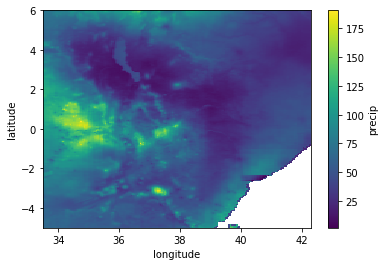

In [77]:
c.mean(dim='time').plot();

In [94]:
(c < 1).resample(time='Q-NOV').apply(, dim='time')